# **Install Before Running Code**

In [ ]:
pip install PyInputPlus


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyInputPlus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11349 sha256=c52be8ae252afc208f8f21bf6ea9f1c94992fdff98c8411b6e4129b4e84b4901
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16224 sha256=4d5dacbee44b4b0b57a494114923b0c30f247a865299320707a29ccb7d40b6c0
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

# **Manual Test- Test Area**

<ipython-input-21-8cf7e3de9810>:102: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


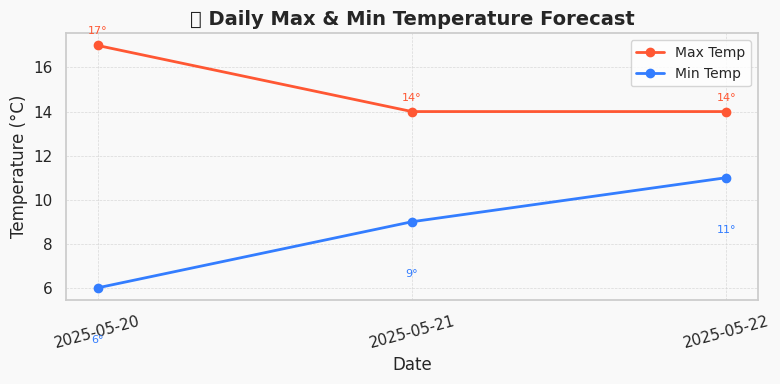

<ipython-input-21-8cf7e3de9810>:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=dates, y=rain_chances, ax=ax, palette='Blues')
<ipython-input-21-8cf7e3de9810>:150: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


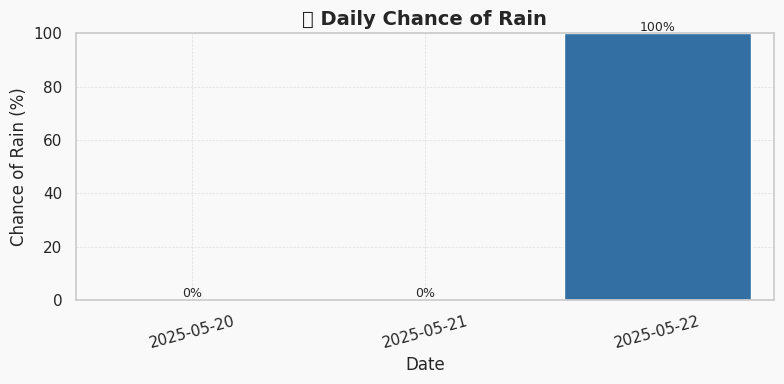

The chance of rain today in In Brisbane is 0%.


In [22]:
# Manual test: Run this in a separate cell to test visualisation directly
test_data = get_weather_data("Melbourne")
create_temperature_visualisation(test_data)
create_precipitation_visualisation(test_data)

# Manual test: Natural language question
parsed = parse_weather_question("Will it rain in Brisbane?")
if parsed['location']:
    weather = get_weather_data(parsed['location'])
    if weather:
        print(generate_weather_response(parsed, weather))


## **Main Code**

In [ ]:
# 📦 Import necessary libraries
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pyinputplus as pyip
import re

# 🔧 Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

import requests

def get_weather_data(location, forecast_days=3):
    """
    Retrieve weather data from wttr.in for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of forecast days (1–5)

    Returns:
        dict or None: Parsed weather data or None if an error occurs
    """
    if not location or not isinstance(location, str):
        print("❌ Invalid location. Please enter a valid city or place name.")
        return None

    if not (1 <= forecast_days <= 5):
        print("⚠️ Forecast days must be between 1 and 5. Defaulting to 3.")
        forecast_days = 3

    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url, timeout=10)  # ⏱️ Add timeout for safety
        response.raise_for_status()  # 🚨 Raise exception for HTTP errors

        data = response.json()

        # ✅ Validate basic structure
        if "current_condition" not in data or "weather" not in data:
            print("⚠️ Incomplete weather data received.")
            return None

        # Limit forecast to the number of days requested
        data["weather"] = data["weather"][:forecast_days]
        return data

    except requests.exceptions.RequestException as req_err:
        print(f"🔌 Network error: {req_err}")
    except ValueError:
        print("❌ Failed to decode JSON from wttr.in.")
    except Exception as e:
        print(f"⚠️ Unexpected error: {e}")

    return None

import matplotlib.pyplot as plt
import seaborn as sns

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a sleek and compact line chart for max and min temperatures.

    Args:
        weather_data (dict): Weather data from wttr.in
        output_type (str): 'display' or 'figure'
    """
    try:
        if not weather_data or 'weather' not in weather_data:
            raise ValueError("Invalid or missing weather data.")

        dates = []
        max_temps = []
        min_temps = []

        for day in weather_data['weather']:
            dates.append(day['date'])
            max_temps.append(int(day['maxtempC']))
            min_temps.append(int(day['mintempC']))

        fig, ax = plt.subplots(figsize=(8, 4))

        ax.plot(dates, max_temps, label='Max Temp', marker='o', linewidth=2, color='#FF5733')
        ax.plot(dates, min_temps, label='Min Temp', marker='o', linewidth=2, color='#337DFF')

        ax.set_title("🌡️ Daily Max & Min Temperature Forecast", fontsize=14, weight='bold')
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel("Temperature (°C)", fontsize=12)
        ax.set_facecolor("#f9f9f9")
        fig.patch.set_facecolor('#f9f9f9')

        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.legend(fontsize=10, loc='upper right')
        ax.tick_params(axis='x', rotation=15)

        for i in range(len(dates)):
            ax.text(dates[i], max_temps[i] + 0.5, f'{max_temps[i]}°', ha='center', fontsize=8, color='#FF5733')
            ax.text(dates[i], min_temps[i] - 2.5, f'{min_temps[i]}°', ha='center', fontsize=8, color='#337DFF')

        plt.tight_layout()

        if output_type == 'display':
            plt.show()
        else:
            return fig

    except Exception as e:
        print(f"❌ Error generating temperature visualisation: {e}")


def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a stylish bar chart for daily rain probability.

    Args:
        weather_data (dict): Weather data from wttr.in
        output_type (str): 'display' or 'figure'
    """
    try:
        if not weather_data or 'weather' not in weather_data:
            raise ValueError("Invalid or missing weather data.")

        dates = []
        rain_chances = []

        for day in weather_data['weather']:
            dates.append(day['date'])
            rain_chances.append(int(day['hourly'][0]['chanceofrain']))

        fig, ax = plt.subplots(figsize=(8, 4))

        bars = sns.barplot(x=dates, y=rain_chances, ax=ax, palette='Blues')

        ax.set_title("🌧️ Daily Chance of Rain", fontsize=14, weight='bold')
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel("Chance of Rain (%)", fontsize=12)
        ax.set_ylim(0, 100)
        ax.set_facecolor("#f9f9f9")
        fig.patch.set_facecolor('#f9f9f9')

        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
        ax.tick_params(axis='x', rotation=15)

        for bar, chance in zip(bars.patches, rain_chances):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                    f'{chance}%', ha='center', fontsize=9)

        plt.tight_layout()

        if output_type == 'display':
            plt.show()
        else:
            return fig

    except Exception as e:
        print(f"❌ Error generating precipitation visualisation: {e}")




def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Parsed info (location, weather attribute, etc.)
    """
    question = question.lower()
    parsed = {"location": None, "attribute": None}

    match = re.search(r'in ([a-zA-Z\s]+)', question)
    if match:
        parsed["location"] = match.group(1).strip()

    if 'rain' in question:
        parsed["attribute"] = 'rain'
    elif 'temperature' in question or 'hot' in question or 'cold' in question:
        parsed["attribute"] = 'temperature'
    else:
        parsed["attribute"] = 'general'

    return parsed

def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response based on parsed question and data.

    Args:
        parsed_question (dict): Result from `parse_weather_question`
        weather_data (dict): Data from `get_weather_data`

    Returns:
        str: Natural language answer
    """
    location = parsed_question['location']
    attribute = parsed_question['attribute']
    current = weather_data['current_condition'][0]

    if attribute == 'temperature':
        return (f"The current temperature in {location.title()} is "
                f"{current['temp_C']}°C, with a feels-like of {current['FeelsLikeC']}°C.")
    elif attribute == 'rain':
        rain_chance = weather_data['weather'][0]['hourly'][0]['chanceofrain']
        return f"The chance of rain today in {location.title()} is {rain_chance}%."
    else:
        condition = current['weatherDesc'][0]['value']
        return (f"Currently in {location.title()}, it's {condition} with a temperature of "
                f"{current['temp_C']}°C.")
def menu():
    print("\n🌤️  Welcome to WeatherWise: Your Intelligent Weather Companion! 🌤️")
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

    while True:
        print("\n🔸 What would you like to do today?")
        choice = pyip.inputMenu(
            ['📍 Check Current Weather',
             '🧠 Ask a Weather Question',
             '📊 View Weather Visualisations',
             '❌ Exit Application'],
            numbered=True
        )

        if choice == '📍 Check Current Weather':
            location = pyip.inputStr("\n🔎 Please enter a city or location: ").strip()
            print("⏳ Retrieving weather data...")
            data = get_weather_data(location)
            if data:
                print("\n✅ Weather Summary for", location.title())
                print("──────────────────────────────────────────")
                print(generate_weather_response({"location": location, "attribute": "general"}, data))
            else:
                print("⚠️  Unable to retrieve weather data. Please check the location or try again later.")

        elif choice == '🧠 Ask a Weather Question':
            question = pyip.inputStr("\n💬 Ask your question (e.g. Will it rain in Perth tomorrow?): ").strip()
            parsed = parse_weather_question(question)
            if parsed['location']:
                print(f"🤖 Analyzing your question about {parsed['location'].title()}...")
                data = get_weather_data(parsed['location'])
                if data:
                    print("\n🗨️  WeatherWise says:")
                    print("──────────────────────")
                    print(generate_weather_response(parsed, data))
                else:
                    print("⚠️  Sorry, I couldn't get data for that location.")
            else:
                print("❗ I couldn't detect the location. Try rephrasing your question.")

        elif choice == '📊 View Weather Visualisations':
            location = pyip.inputStr("\n📍 Enter the location for weather charts: ").strip()
            print("📡 Gathering forecast data...")
            data = get_weather_data(location)
            if data:
                print("\n📈 Temperature Forecast:")
                create_temperature_visualisation(data)
                print("\n🌧️ Rain Probability:")
                create_precipitation_visualisation(data)
            else:
                print("⚠️  Unable to generate charts. Please try another location.")

        else:  # ❌ Exit Application
            print("\n👋 Thanks for using WeatherWise. Stay safe and weather-aware!")
            print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
            break


if __name__ == "__main__":
    menu()

# Example: Fetch weather and show temp plot for testing
sample_data = get_weather_data("Melbourne")
print(generate_weather_response({"location": "Melbourne", "attribute": "temperature"}, sample_data))

create_temperature_visualisation(sample_data)
create_precipitation_visualisation(sample_data)

# Example: NLP question
parsed = parse_weather_question("Will it rain in Brisbane?")
print(parsed)
print(generate_weather_response(parsed, get_weather_data(parsed["location"])))



🌤️  Welcome to WeatherWise: Your Intelligent Weather Companion! 🌤️
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔸 What would you like to do today?
Please select one of the following:
1. 📍 Check Current Weather
2. 🧠 Ask a Weather Question
3. 📊 View Weather Visualisations
4. ❌ Exit Application
